# Flavors of Cacao by S. Williams 
First, let's import numpy, pandas, matplotlib, sklearn, and seaborn.

In [384]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [385]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

Acknowledgement: The dataset below is from Kaggle.com, posted by Rachel Tatman. https://www.kaggle.com/rtatman/chocolate-bar-ratings.

In [386]:
df = pd.read_csv('flavors_of_cacao.csv', dtype=str)

In [387]:
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.5,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.5,,Peru


In [388]:
df.shape

(1795, 9)

In [389]:
#Let's clean up the column titles.

df.columns = [label.replace('\n', '_') for label in df.columns]
df.head()

,Company _(Maker-if known),Specific Bean Origin_or Bar Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.5,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.5,,Peru


Questions for this dataset:

1) What is the absolute best tasting chocolate bar (5 being the highest rated, 1 is lowest)?

2) What is the distribution of ratings?

3) Is there a relationship between the best tasting chocolate and cacao bean origin?

4) What is the "best tasting" manufacturer of chocolate in the world?

5) Can we use a linear model to determine a formula for the perfect chocolate bar?

# Let's answer question 1 above first.  What is the absolute best tasting cacao?

In [390]:
#Must convert 'Rating' column to float
df['Rating_float']=pd.to_numeric(df['Rating'], downcast='float')

In [391]:
df['Rating_float'].dtype # See data type changed to float 32 bit

dtype('float32')

In [392]:
#What is the absolute highest rating in the dataset?
df[df['Rating_float']== df['Rating_float'].max()] 

,Company _(Maker-if known),Specific Bean Origin_or Bar Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad Bean_Origin,Rating_float
78,Amedei,Chuao,111,2007,70%,Italy,5,Trinitario,Venezuela,5.0
86,Amedei,Toscano Black,40,2006,70%,Italy,5,Blend,,5.0


We have a tie for first place, with both chocolate bars manufactured by Amadei.  The Chuao bar and Toscano Black are tied for the max rating.

# Let's move to question 2 for a distribution of ratings.

Text(0.5, 1.0, 'Distribution of Ratings')

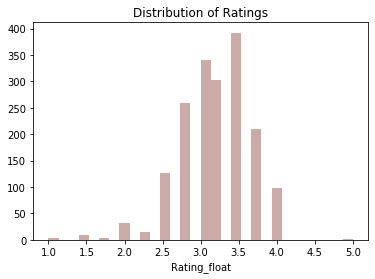

In [393]:
sns.distplot(df['Rating_float'], kde=False, bins=30, color='#7B2F24').set_title('Distribution of Ratings')
#Note the hex code for brown, the color of chocolate. 

In [394]:
#What is the overall average rating of chocolate in this dataset?
df['Rating_float'].mean()

3.1859331130981445

# Question 3.  Do specific cacao bean sources produce higher rated chocolate?

In [395]:
groupby_origin = df.groupby('Broad Bean_Origin').mean()['Rating_float']
df_groupby_origin = pd.DataFrame(groupby_origin)
df_groupby_origin.reset_index()

df_groupby_origin[df_groupby_origin['Rating_float'] == df_groupby_origin['Rating_float'].max()] 

,Rating_float
Broad Bean_Origin,
"Dom. Rep., Madagascar",4.0
"Gre., PNG, Haw., Haiti, Mad",4.0
"Guat., D.R., Peru, Mad., PNG",4.0
"Peru, Dom. Rep",4.0
"Ven, Bolivia, D.R.",4.0
"Venezuela, Java",4.0


Great! Now we know that the chocolate with the highest ratings uses beans sourced from the Dominican Republic, Madagascar, Peru, Venezuela, Haiti, Guatemala, etc. 

For fun, what are the bean origins of the worst ratings?

In [396]:
df_groupby_origin[df_groupby_origin['Rating_float'] <=2.75] 

#There is some overlap with the list above, which suggests that bean sourcing 
#may not be the only factor in a great chocolate bar.

,Rating_float
Broad Bean_Origin,
"Africa, Carribean, C. Am.",2.750000
"Cost Rica, Ven",2.750000
Ghana & Madagascar,2.000000
Martinique,2.750000
"Peru, Madagascar",2.500000
Principe,2.750000
Puerto Rico,2.500000
Trinidad-Tobago,2.750000
"Venezuela, Dom. Rep.",2.750000


In [397]:
#From how many unique countries were cacao beans sourced?
df['Broad Bean_Origin'].nunique()

100

# Question 4: What are the best chocolate manufacturers in the world?

In [398]:
df_high_rate = df[df['Rating_float']>=4.0]

In [399]:
df_high_rate.head()

,Company _(Maker-if known),Specific Bean Origin_or Bar Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad Bean_Origin,Rating_float
9,A. Morin,Pablino,1319,2014,70%,France,4,,Peru,4.0
17,A. Morin,Chuao,1015,2013,70%,France,4,Trinitario,Venezuela,4.0
20,A. Morin,Chanchamayo Province,1019,2013,63%,France,4,,Peru,4.0
54,Amano,Morobe,725,2011,70%,U.S.A.,4,,Papua New Guinea,4.0
56,Amano,Guayas,470,2010,70%,U.S.A.,4,,Ecuador,4.0


In [400]:
df_high_rate.shape  
# There are 100 chocolate bars that exceed a 4 star rating.

(100, 10)

In [401]:
df_company=df.groupby('Company_Location')['Rating_float']
df_company

# Question 5: Can we model a perfect chocolate bar?

In [402]:
#First, I want to convert Cocoa\nPercent to a float so we can use it as a numeric variable

df['Cocoa_Pct_Float'] = df.apply(lambda x: x['Cocoa_Percent'][:2], axis=1)
df['Cocoa_Pct_Float'] = pd.to_numeric(df['Cocoa_Pct_Float'], downcast='float')
df['Cocoa_Pct_Float'].dtype

dtype('float32')

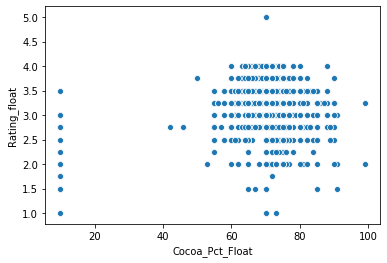

In [403]:
sns.scatterplot(x='Cocoa_Pct_Float', y='Rating_float', data=df)

Now that the percent cocoa is converted to a float, we can attempt to model the perfect chocolate formula using numeric (percent cocoa) and categorical (eg Company location) variables.

In [404]:
#Let's make sure the data is clean.

df=df.dropna(subset=['Rating_float'], axis=0)
df['Rating_float'].isnull().value_counts()


#Now we know that every row in the dataframe has a rating.

False    1795
Name: Rating_float, dtype: int64

In [405]:
#Let's get a list of all categorical columns
cat_cols_lst = df.select_dtypes(include=['object'])
cat_cols_lst

,Company _(Maker-if known),Specific Bean Origin_or Bar Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.5,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.5,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.5,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [406]:
#Let's build a linear model.

#Define the response
y = df['Rating_float']

#Fill in dummy categorical variables.
for var in cat_cols_lst:
    df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

X = df

In [407]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.30, random_state=42)

lm_model = LinearRegression(normalize=True) #Instantiate
lm_model.fit(X_train, y_train)

#Predict using model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [408]:
test_score

0.7380630838573305

In [409]:
train_score

0.9999999999926017